In [1]:
using Pkg; Pkg.activate(".")
using Plots

  Activating environment at `~/Documents/Papers/inverse/Project.toml`


In [2]:
function swap(a,b)
    tmp = a
    a = sign(b)*abs(b)
    b = sign(tmp)*abs(tmp)
    return a,b
end

swap (generic function with 1 method)

In [3]:
function l(x::Float64, a::Float64, b::Float64)
    if -a*x - b > 0
        return sqrt(-a*x - b)
    else
        return 0
    end
end

function r(x::Float64, c::Float64, d::Float64)
    if c*x - d > 0
        return sqrt(c*x - d)
    else
        return 0
    end
end

function gaussian(x::Float64, β::Float64, μ::Float64)
    sqrt(β/π)*exp(-β*(x - μ)^2)
end

gaussian (generic function with 1 method)

In [21]:
bmin = 0.01
db = 0.01
bmax = 5.0
beta = collect(bmin:db:bmax)

500-element Vector{Float64}:
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 0.13
 ⋮
 4.89
 4.9
 4.91
 4.92
 4.93
 4.94
 4.95
 4.96
 4.97
 4.98
 4.99
 5.0

a = 0.6960991252820417
b = -0.12765971722352454
c = 0.9248343554400513
d = 0.19157073679240577
-b/a = 0.1833930148551761
d/c = 0.20714059297813744


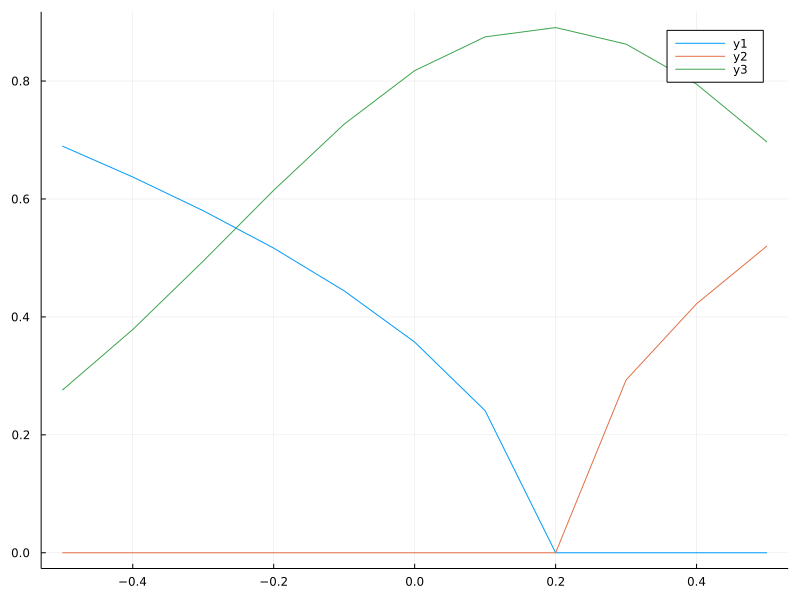

In [111]:
a,c = rand(Float64, 2)
b,d = rand(Float64, 2) .* sign.(randn(Float64, 2))
if abs(a) < abs(b)
    bs = sign(b)
    temp = a
    a = abs(b)
    b = bs*temp
end
if abs(c) < abs(d)
    cs = sign(d)
    temp = c
    c = abs(d)
    d = cs*temp
end
while d/c < -b/a
    tmp, d = d, -b
    b = -tmp
    a, c = c, a
end
μ_t = rand(Float64)
μ = (1-μ_t)*(-b/a) + μ_t*(d/c)
xs = collect(-.5:0.1:.5)
println("a = ",a)
println("b = ",b)
println("c = ",c)
println("d = ",d)
println("-b/a = ", -b/a)
println("d/c = ", d/c)
Plots.plot(xs, map(x -> l(x, a, b), xs), size=(800,600))
Plots.plot!(xs, map(x -> r(x, c, d), xs))
Plots.plot!(xs, map(x -> gaussian(x,(bmax-bmin)/2, μ), xs))

In [54]:
a = 0.641297250360789
b = 0.49575326984235923
c = 0.5595717622370024
d = -0.4111299930857404

println(d/c)
println(-b/a)
println("Bandcross: ", d/c < -b/a)

-0.7347225518352896
-0.7730475525404985
Bandcross: false


In [55]:
tmp, d = d, -b
b = -tmp
a, c = c, a
println(a)
println(b)
println(c)
println(d)

0.5595717622370024
0.4111299930857404
0.641297250360789
-0.49575326984235923


In [56]:
println(d/c)
println(-b/a)
println("Bandcross: ", d/c < -b/a)

-0.7730475525404985
-0.7347225518352896
Bandcross: true


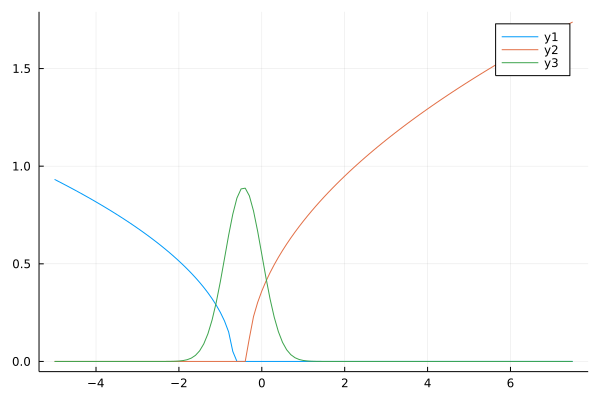

In [46]:
Plots.plot(xs, map(x -> l(x, a, b), xs))
Plots.plot!(xs, map(x -> r(x, c, d), xs))
Plots.plot!(xs, map(x -> gaussian(x,(bmax-bmin)/2, μ), xs))

In [4]:
using JLD2: @load
train_file = "data/train_data.out"
test_file = "data/test_data.out"
@load train_file traindata
@load test_file testdata
println(size(traindata))
println(typeof(traindata))

(1000001,)
Vector{Tuple{Vector{Float64}, Vector{Float64}}}


In [52]:
using Polynomials

In [58]:
pol.coeffs

5-element Vector{Float64}:
 -0.0062
  0.093
 -0.0437
  0.0086
 -0.0006

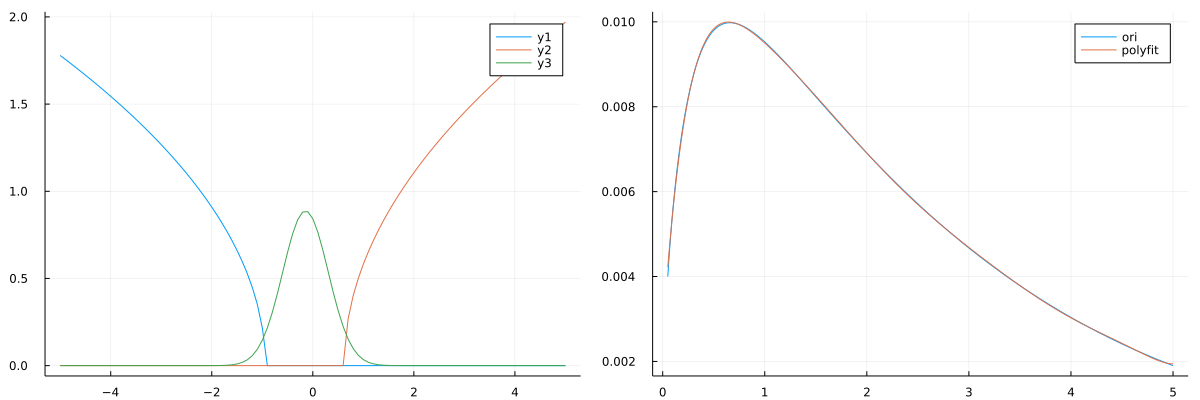

In [210]:
index = 6#rand(1:length(traindata[:][1]))
bmin = 0.05
db = 0.01
bmax = 5.0
beta = collect(bmin:db:bmax)
a,b,c,d,μ = traindata[index][2]
xs = collect(-5:0.1:5.0)
p1 = Plots.plot(xs, map(x -> l(x, a, b), xs))
Plots.plot!(p1, xs, map(x -> r(x, c, d), xs))
Plots.plot!(p1, xs, map(x -> gaussian(x,(bmax-bmin)/2, μ), xs))
pol = fit(beta, traindata[index][1], 9)
p2 = Plots.plot(beta, traindata[index][1], label="ori")
Plots.plot!(p2, beta, map(x -> pol(x), beta), label="polyfit")
Plots.plot(p1, p2, size=(1200,400))

In [209]:
index = 12#rand(1:length(traindata[:][1]))
bmin = 0.05
db = 0.01
bmax = 5.0
beta = collect(bmin:db:bmax)
a,b,c,d,μ = traindata[index][2]
pol = fit(beta, traindata[index][1], 9)
(pol.coeffs, [a,b,c,d,μ])

([0.001322709387547825, 0.013167904611674565, -0.04605255386921864, 0.0637263273224094, -0.04824743364268662, 0.022041325957428255, -0.006233901058206146, 0.0010677708881620025, -0.00010147394083926943, 4.105444137196791e-6], [0.385666034920803, -0.30259663382082214, 0.3565966958251361, 0.2899642730909302, 0.8062831259817747])

In [212]:
typeof(pol.coeffs)

Vector{Float64} (alias for Array{Float64, 1})

In [113]:
num_rows = Int64(round(length(traindata)))
num_column = length(traindata[1][1])
num_params = length(traindata[1][2])+1

x_train = Array{Float64,2}(undef, num_rows*num_column, num_params)
y_train = Array{Float64,1}(undef, num_rows*num_column)

LoadError: OutOfMemoryError()

In [114]:
xmin = 0.05
dx = 0.01
xmax = 5.0
beta = collect(xmin:dx:xmax)

496-element Vector{Float64}:
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 0.13
 0.14
 0.15
 0.16
 0.17
 ⋮
 4.89
 4.9
 4.91
 4.92
 4.93
 4.94
 4.95
 4.96
 4.97
 4.98
 4.99
 5.0

In [213]:
xs = collect(-5:0.1:5.0)
typeof(xs)

Vector{Float64} (alias for Array{Float64, 1})

In [10]:
push!(traindata[1][2], beta[2])

5-element Vector{Float64}:
  0.8966256574673253
  0.4107459916051559
  0.8933331189402165
  0.04995796871762037
 -0.43318686083600866

In [ ]:
for i in 1:length(num_rows)
    for j un 1:length(num_column)
        x_train[i*num_column+j,:] = push!(copy(traindata[i][2], beta[j])
        y_train[i*num_column+j]= traindata[i][1][j]